<a href="https://colab.research.google.com/github/RemasNawaf1212/Sonar-ML-Project/blob/main/Sonar_ML_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os, pandas as pd


os.makedirs("data/original_data", exist_ok=True)
os.makedirs("data/preprocessed_data", exist_ok=True)
os.makedirs("data/Results", exist_ok=True)

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data"
cols = [f"V{i+1}" for i in range(60)] + ["Label"]
df = pd.read_csv(url, header=None, names=cols)

df["Label"] = df["Label"].map({"R":0, "M":1})

X = df.drop("Label", axis=1)
y = df["Label"]
X.to_csv("data/original_data/X_sonar_original.csv", index=False)
y.to_csv("data/original_data/Y_sonar_original.csv", index=False)

print("✅ Saved original data:", os.listdir("data/original_data"))
print("Shape:", X.shape, y.shape)


✅ Saved original data: ['X_sonar_original.csv', 'Y_sonar_original.csv']
Shape: (208, 60) (208,)


<class 'pandas.core.series.Series'>
0    0
1    0
2    0
3    0
4    0
Name: Label, dtype: int64
Descriptive statistics:


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Label
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507,0.533654
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031,0.500070
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600,0.000000
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100,0.000000
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300,1.000000
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525,1.000000
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900,1.000000


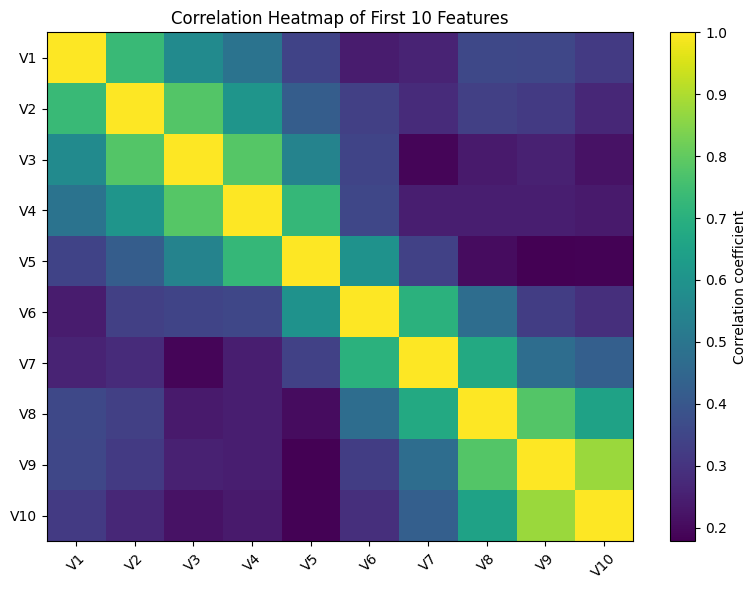

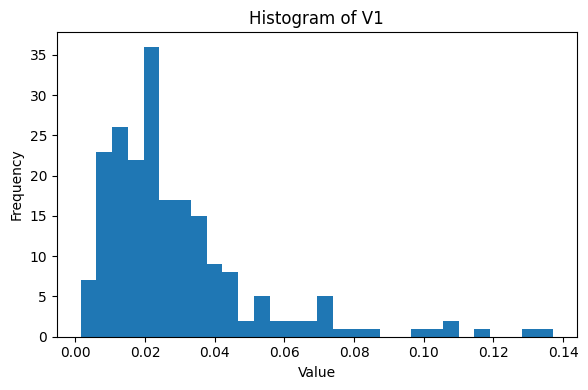

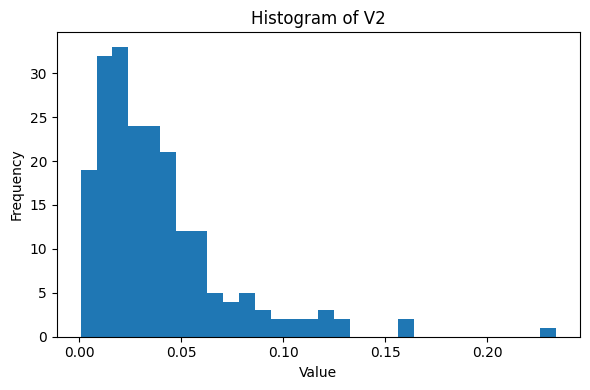

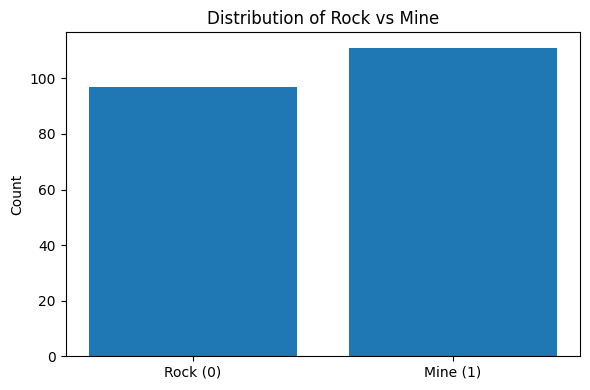

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

X = pd.read_csv("data/original_data/X_sonar_original.csv")

y_df = pd.read_csv("data/original_data/Y_sonar_original.csv")
y    = y_df.squeeze()

print(type(y))
print(y.head())

y.name = "Label"


df = X.copy()
df["Label"] = y

print("Descriptive statistics:")
display(df.describe())

corr = X.iloc[:, :10].corr()
plt.figure(figsize=(8,6))
plt.imshow(corr, aspect='auto')
plt.colorbar(label="Correlation coefficient")
plt.xticks(range(10), corr.columns, rotation=45)
plt.yticks(range(10), corr.columns)
plt.title("Correlation Heatmap of First 10 Features")
plt.tight_layout()
plt.show()

for feature in ["V1", "V2"]:
    plt.figure(figsize=(6,4))
    plt.hist(df[feature], bins=30)
    plt.title(f"Histogram of {feature}")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

counts = df["Label"].value_counts().sort_index()
plt.figure(figsize=(6,4))
plt.bar(["Rock (0)", "Mine (1)"], counts)
plt.title("Distribution of Rock vs Mine")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = pd.read_csv("data/original_data/X_sonar_original.csv")

y = pd.read_csv("data/original_data/Y_sonar_original.csv")["Label"]

print("X rows:", len(X), "y rows:", len(y))

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test_scaled  = pd.DataFrame(scaler.transform(X_test),  columns=X.columns)

os.makedirs("data/preprocessed_data", exist_ok=True)
X_train_scaled.to_csv("data/preprocessed_data/X_train.csv", index=False)
X_test_scaled .to_csv("data/preprocessed_data/X_test.csv",  index=False)
y_train.to_csv("data/preprocessed_data/Y_train.csv", index=False, header=False)
y_test .to_csv("data/preprocessed_data/Y_test.csv",  index=False, header=False)

print("\n✅ Preprocessed files:")
print(os.listdir("data/preprocessed_data"))
print("\nShapes:")
print("  X_train:", X_train_scaled.shape)
print("  X_test: ", X_test_scaled.shape)
print("  y_train:", y_train.shape)
print("  y_test: ", y_test.shape)


X rows: 208 y rows: 208

✅ Preprocessed files:
['X_test.csv', 'X_train.csv', 'Y_train.csv', 'Y_test.csv']

Shapes:
  X_train: (166, 60)
  X_test:  (42, 60)
  y_train: (166,)
  y_test:  (42,)


In [ ]:
import os

for root, dirs, files in os.walk("data"):
    print(root, ":", files)


data : []
data/preprocessed_data : ['X_test.csv', 'X_train.csv', 'Y_train.csv', 'Y_test.csv']
data/Results : []
data/original_data : ['X_sonar_original.csv', 'Y_sonar_original.csv']


▶ Model Accuracies:


,Model,Accuracy
2,SVM,0.928571
6,ANN,0.880952
0,LogisticRegression,0.833333
4,RandomForest,0.809524
1,KNN,0.785714
3,DecisionTree,0.761905
5,NaiveBayes,0.738095


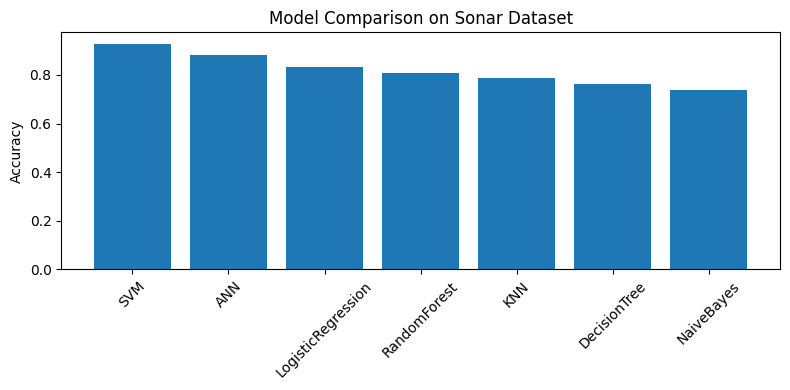

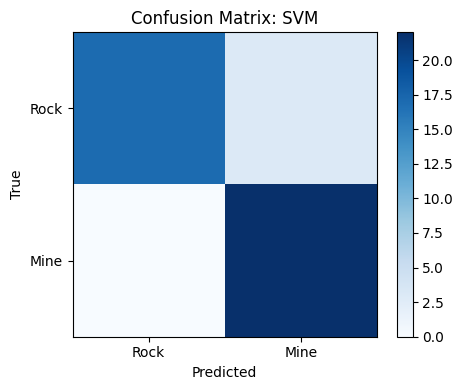

In [ ]:
import os, pandas as pd
from sklearn.linear_model     import LogisticRegression
from sklearn.neighbors        import KNeighborsClassifier
from sklearn.svm              import SVC
from sklearn.tree             import DecisionTreeClassifier
from sklearn.ensemble         import RandomForestClassifier
from sklearn.naive_bayes      import GaussianNB
from sklearn.neural_network   import MLPClassifier
from sklearn.metrics          import accuracy_score, confusion_matrix
import matplotlib.pyplot      as plt

X_train = pd.read_csv("data/preprocessed_data/X_train.csv")
X_test  = pd.read_csv("data/preprocessed_data/X_test.csv")
y_train = pd.read_csv("data/preprocessed_data/Y_train.csv", header=None).iloc[:,0]
y_test  = pd.read_csv("data/preprocessed_data/Y_test.csv",  header=None).iloc[:,0]

models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "KNN":                KNeighborsClassifier(),
    "SVM":                SVC(),
    "DecisionTree":       DecisionTreeClassifier(),
    "RandomForest":       RandomForestClassifier(n_estimators=100, random_state=42),
    "NaiveBayes":         GaussianNB(),
    "ANN":                MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
}

os.makedirs("data/Results", exist_ok=True)
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc   = accuracy_score(y_test, preds)
    results.append((name, acc))
    pd.DataFrame(preds, columns=["Prediction"])\
      .to_csv(f"data/Results/predictions_{name}.csv", index=False)

results_df = pd.DataFrame(results, columns=["Model","Accuracy"])\
               .sort_values("Accuracy", ascending=False)
print("▶ Model Accuracies:")
display(results_df)

plt.figure(figsize=(8,4))
plt.bar(results_df["Model"], results_df["Accuracy"])
plt.xticks(rotation=45)
plt.title("Model Comparison on Sonar Dataset")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()

best_name  = results_df.iloc[0]["Model"]
best_model = models[best_name]
cm = confusion_matrix(y_test, best_model.predict(X_test))

plt.figure(figsize=(5,4))
plt.imshow(cm, cmap="Blues", interpolation="nearest")
plt.title(f"Confusion Matrix: {best_name}")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks([0,1], ["Rock","Mine"])
plt.yticks([0,1], ["Rock","Mine"])
plt.colorbar()
plt.tight_layout()
plt.show()


In [ ]:
!git config --global user.email "rrrwwt160@gmail.com"
!git config --global user.name  "RemasNawaf1212"


In [ ]:
!git clone https://github.com/YourGitHubUsername/Sonar-ML-Project.git repo


Cloning into 'repo'...
fatal: could not read Username for 'https://github.com': No such device or address


In [ ]:
!cp -r data repo/data
!cp notebook.ipynb repo/notebook.ipynb


cp: cannot create directory 'repo/data': No such file or directory
cp: cannot stat 'notebook.ipynb': No such file or directory


In [13]:
%cd /content

!zip -r data.zip data


/content
  adding: data/ (stored 0%)
  adding: data/preprocessed_data/ (stored 0%)
  adding: data/preprocessed_data/X_test.csv (deflated 52%)
  adding: data/preprocessed_data/X_train.csv (deflated 54%)
  adding: data/preprocessed_data/Y_train.csv (deflated 82%)
  adding: data/preprocessed_data/Y_test.csv (deflated 73%)
  adding: data/Results/ (stored 0%)
  adding: data/Results/predictions_ANN.csv (deflated 65%)
  adding: data/Results/predictions_NaiveBayes.csv (deflated 63%)
  adding: data/Results/predictions_DecisionTree.csv (deflated 67%)
  adding: data/Results/predictions_KNN.csv (deflated 61%)
  adding: data/Results/predictions_SVM.csv (deflated 69%)
  adding: data/Results/predictions_LogisticRegression.csv (deflated 65%)
  adding: data/Results/predictions_RandomForest.csv (deflated 64%)
  adding: data/original_data/ (stored 0%)
  adding: data/original_data/X_sonar_original.csv (deflated 67%)
  adding: data/original_data/Y_sonar_original.csv (deflated 97%)


In [14]:
from google.colab import files
files.download('data.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>